# Unit 5 - Financial Planning #

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline 

In [33]:
 # Load .env enviroment variables
load_dotenv()

True

# Part 1 - Personal Finance Planner #
## Collect Crypto Prices Using the requests Library ##

In [34]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD" 

# Submit request and format output
btc_url = btc_url + "?format=json"
response_data = requests.get(btc_url).json()

# Fetch current BTC price
current_btc_value = response_data['data']['1']['quotes']['USD']['price']

# Submit request and format output
eth_url = eth_url + "?format=json"
response_data = requests.get(eth_url).json()

# Fetch current ETH price 
current_eth_value = response_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
btc_value = my_btc * current_btc_value
eth_value = my_eth * current_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${current_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${current_eth_value:0.2f}")


The current value of your 1.2 BTC is $40636.00
The current value of your 5.3 ETH is $3008.75


## Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds) ##

In [35]:
# Set current amount of shares
my_agg = 200
my_spy = 50 

# Set Alpaca API key and secret
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [36]:
type(alpaca_api_key)

str

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_shares_bonds = api.get_bars(
    tickers,
    timeframe,
    start=today,
    end=today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_shares_bonds[df_shares_bonds['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_shares_bonds[df_shares_bonds['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_shares_bonds = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_shares_bonds

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2020-12-31 05:00:00+00:00  118.18  118.24  118.12  118.19  4834717   

                                                      SPY                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2020-12-31 05:00:00+00:00       17019  118.187165  371.85  374.66  371.232   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-12-31 05:00:00+00:00  373.88  78734159      301443  373.200854

In [11]:
# Fetch the current closing prices from the DataFrame
agg_close_price = float(df_shares_bonds["AGG"]["close"])
spy_close_price = float(df_shares_bonds["SPY"]["close"])
print(agg_close_price)
print(spy_close_price)

118.19
373.88


In [12]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy


# Print current value of shares
print(f"The current value of your {my_agg} AGG bonds is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")



The current value of your 200 AGG bonds is $23638.00
The current value of your 50 SPY shares is $18694.00


 ## Savings Health Analysis ##

In [13]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_assets = (current_btc_value + current_eth_value) 
shares_assets = (my_agg_value + my_spy_value)


In [14]:
#Shares and crypto data
investment_data = {
    "amount" : [crypto_assets, shares_assets]
}



# Set the tickers
tickers = ["crypto", "shares"]


# Create savings DataFrame
df_savings = pd.DataFrame(investment_data, index=tickers)

# Display savings DataFrame
display(df_savings) 

amount
crypto  43307.16
shares  42332.00

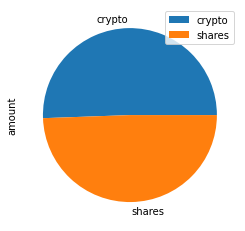

In [15]:
# Plot savings pie chart
df_savings.plot.pie(y=("amount"));

In [37]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_assets + shares_assets
print(f"Your total amount of saving is ${total_savings:0.2f}")

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! you have enough money in your emergency fund")
    
elif total_savings == emergency_fund:
    print(f"Congratulations! you have reached your financial goal")
    
else:
    print(f"Sorry! you are still missing ${total_savings - emergency_fund:0.2f} away from your financial goal")

Your total amount of saving is $85639.16
Congratulations! you have enough money in your emergency fund


# Part 2 - Retirement Planning #

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-04-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-21', tz='America/New_York').isoformat()
# Set timeframe to '1D'
timeframe = "1D"

# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]

stock_data_df = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = stock_data_df[stock_data_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = stock_data_df[stock_data_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
stock_data_df = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
stock_data_df.head()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2017-04-21 04:00:00+00:00  109.40  109.4899  109.30  109.34  1539265   
2017-04-24 04:00:00+00:00  109.05  109.2200  109.00  109.18  2745689   
2017-04-25 04:00:00+00:00  108.99  109.0450  108.77  108.82  1888469   
2017-04-26 04:00:00+00:00  108.85  108.9700  108.77  108.96  2893801   
2017-04-27 04:00:00+00:00  108.94  109.1000  108.91  109.06  1660940   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2017-04-21 04:00:00+00:00        8708  109.386803  235.22  235.31  234.1300   
2017-04-24 04:00:00+00:00       10549  109.150827  237.17  237.41  234.5628   
2017-04-25 04:00:00+00:00       10064  108.912429  237.93  238.95  237.8100   
2017-04-26 04:00:00+00:00       10145  108.884769  238.53  239.53  238.3500   
2017-04-27 04:00:00+00:00        7367  109.026595  238.74  238.95  237.9800   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-04-21 04:00:00+00:00  234.59  110389847      258915  234.784238  
2017-04-24 04:00:00+00:00  237.17  119209877      290927  236.615988  
2017-04-25 04:00:00+00:00  238.55   76698265      240232  238.459191  
2017-04-26 04:00:00+00:00  238.40   84702455      260064  238.801347  
2017-04-27 04:00:00+00:00  238.60   57410326      189214  238.526193

## Retirement Analysis ## 

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years = MCSimulation(
    portfolio_data = stock_data_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Printing the simulation input data
MC_30_years.portfolio_data.head()

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2017-04-21 04:00:00+00:00  109.40  109.4899  109.30  109.34  1539265   
2017-04-24 04:00:00+00:00  109.05  109.2200  109.00  109.18  2745689   
2017-04-25 04:00:00+00:00  108.99  109.0450  108.77  108.82  1888469   
2017-04-26 04:00:00+00:00  108.85  108.9700  108.77  108.96  2893801   
2017-04-27 04:00:00+00:00  108.94  109.1000  108.91  109.06  1660940   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-04-21 04:00:00+00:00        8708  109.386803          NaN  235.22   
2017-04-24 04:00:00+00:00       10549  109.150827    -0.001463  237.17   
2017-04-25 04:00:00+00:00       10064  108.912429    -0.003297  237.93   
2017-04-26 04:00:00+00:00       10145  108.884769     0.001287  238.53   
2017-04-27 04:00:00+00:00        7367  109.026595     0.000918  238.74   

                                                                            \
                             high       low   close     volume trade_count   
timestamp                                                                    
2017-04-21 04:00:00+00:00  235.31  234.1300  234.59  110389847      258915   
2017-04-24 04:00:00+00:00  237.41  234.5628  237.17  119209877      290927   
2017-04-25 04:00:00+00:00  238.95  237.8100  238.55   76698265      240232   
2017-04-26 04:00:00+00:00  239.53  238.3500  238.40   84702455      260064   
2017-04-27 04:00:00+00:00  238.95  237.9800  238.60   57410326      189214   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-04-21 04:00:00+00:00  234.784238          NaN  
2017-04-24 04:00:00+00:00  236.615988     0.010998  
2017-04-25 04:00:00+00:00  238.459191     0.005819  
2017-04-26 04:00:00+00:00  238.801347    -0.000629  
2017-04-27 04:00:00+00:00  238.526193     0.000839

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\USER\bootcamp\unit-5-homework-api\Unit-5---Financial-Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4          5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1     1.000269  1.002517  0.996912  1.001481  1.000541   0.998419  0.999782   
2     0.997253  1.002868  1.009020  0.995960  1.002521   0.990252  0.993811   
3     0.996617  1.003886  1.007920  0.996200  1.011195   0.987890  0.998878   
4     0.994875  0.989103  1.007254  0.990250  1.014514   0.986394  0.996405   
...        ...       ...       ...       ...       ...        ...       ...   
7556  3.512178  8.583241  3.879473  6.689080  3.979121  11.225488  5.119570   
7557  3.514822  8.558406  3.912017  6.697691  3.979103  10.995129  5.090801   
7558  3.522282  8.653108  3.945687  6.640291  3.982087  10.987523  5.032130   
7559  3.489940  8.642625  3.963458  6.630396  3.929269  10.995407  5.054245   
7560  3.477807  8.582883  3.937615  6.622822  3.949693  10.926967  5.049213   

            7          8          9    ...       490        491       492  \
0      1.000000   1.000000   1.000000  ...  1.000000   1.000000  1.000000   
1      1.011786   1.000766   0.997067  ...  0.988973   1.003560  1.003780   
2      1.004337   0.993073   1.000273  ...  0.986083   1.012169  1.005583   
3      1.005015   0.998756   0.992270  ...  0.988855   1.017001  1.005048   
4      0.997558   1.008926   0.997795  ...  0.978043   1.018892  1.005755   
...         ...        ...        ...  ...       ...        ...       ...   
7556  11.891709  16.707198  16.167005  ...  4.640921  31.863941  6.112886   
7557  11.864334  16.706582  15.934205  ...  4.674103  31.812635  6.105157   
7558  11.840310  16.753819  15.843857  ...  4.589243  32.141432  6.079477   
7559  11.816852  16.849773  15.923917  ...  4.581980  32.228032  6.049693   
7560  11.819108  16.871555  15.779178  ...  4.505639  32.108728  6.053183   

           493        494       495        496       497        498       499  
0     1.000000   1.000000  1.000000   1.000000  1.000000   1.000000  1.000000  
1     0.985052   1.002454  1.002579   0.996940  0.999842   1.009094  0.992387  
2     0.983033   0.999661  0.984564   0.995755  0.997916   1.009150  0.996153  
3     0.980263   0.992573  0.977043   1.004729  0.988863   1.013739  0.992777  
4     0.980200   0.988949  0.972683   1.012666  0.991877   1.025416  0.985457  
...        ...        ...       ...        ...       ...        ...       ...  
7556  6.358759   9.990080  9.930742  11.858851  6.928906  29.201566  9.309631  
7557  6.332243  10.013713  9.981481  11.937349  6.945463  29.595565  9.342460  
7558  6.279187  10.118488  9.952336  11.821464  6.924649  29.592583  9.445871  
7559  6.313916  10.161639  9.939455  11.908172  6.904900  29.689061  9.417110  
7560  6.265893  10.130710  9.915102  11.935244  6.935974  29.332395  9.384008  

[7561 rows x 500 columns]

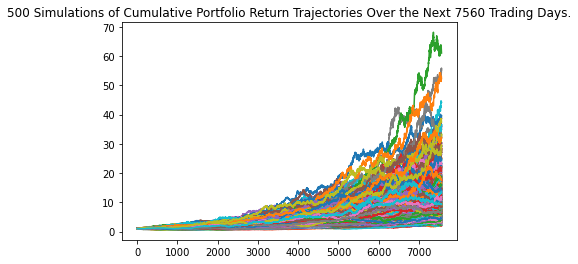

In [20]:
# Plot simulation outcomes
line_plot = MC_30_years.plot_simulation()

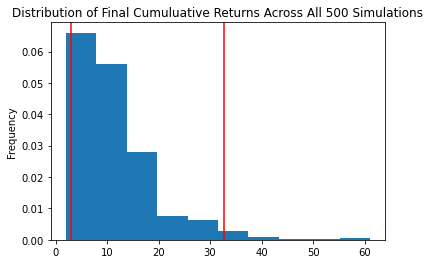

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_years.plot_distribution()

##  Retirement Analysis ##

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
thirty_yr_summary_stat = MC_30_years.summarize_cumulative_return()

# Print summary statistics
print(thirty_yr_summary_stat)

count           500.000000
mean             11.528735
std               8.029444
min               1.979501
25%               6.127092
50%               9.277433
75%              14.524471
max              61.080713
95% CI Lower      2.982503
95% CI Upper     32.733887
Name: 7560, dtype: float64


In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(thirty_yr_summary_stat[8]*20000,2)
ci_upper = round(thirty_yr_summary_stat[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $59650.05 and $654677.73


In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(thirty_yr_summary_stat[8]*initial_investment,2)
ci_upper = round(thirty_yr_summary_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $89475.08 and $982016.6


# Optional Challenge - Early Retirement #
## Five Years Retirement Option ##

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_years = MCSimulation(
    portfolio_data = stock_data_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\USER\bootcamp\unit-5-homework-api\Unit-5---Financial-Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.010866  1.003939  0.998424  1.006029  0.996445  0.997204  1.009116   
2     1.012517  0.996613  1.016815  1.010574  1.002754  0.993111  1.011317   
3     1.023343  0.991739  0.997094  1.011677  0.991266  0.984175  1.010400   
4     1.016373  0.995080  1.010372  1.006258  0.984727  0.986298  1.006529   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.602977  1.441614  1.446247  1.528540  1.581945  2.211311  1.642626   
1257  1.619639  1.440071  1.434951  1.537271  1.586124  2.225686  1.638777   
1258  1.620626  1.429142  1.447245  1.534118  1.579446  2.231951  1.636018   
1259  1.621882  1.434646  1.444459  1.523337  1.569301  2.251828  1.619048   
1260  1.626571  1.448557  1.458627  1.521764  1.559653  2.249912  1.623516   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.999233  1.013695  1.016756  ...  0.997452  0.986750  0.996801   
2     1.007992  1.011467  1.026828  ...  1.006344  0.983615  0.998417   
3     1.004520  1.001045  1.020314  ...  1.007173  0.979950  0.999458   
4     1.001767  0.985140  1.014867  ...  0.994540  0.978336  0.991799   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.660497  1.370450  1.704223  ...  1.841828  1.888838  1.628923   
1257  1.674999  1.356078  1.714628  ...  1.861721  1.878215  1.636116   
1258  1.677144  1.374300  1.710878  ...  1.861274  1.875410  1.628652   
1259  1.687271  1.391746  1.700766  ...  1.860336  1.869691  1.633322   
1260  1.685346  1.399471  1.704090  ...  1.868625  1.879251  1.647903   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.002644  0.990162  0.994007  1.005141  1.013190  0.995831  0.990794  
2     1.003843  0.991437  0.983181  0.991092  1.019339  0.996472  0.995515  
3     1.005822  0.985949  0.989390  0.996512  1.010099  0.984317  0.992338  
4     0.995135  0.994996  0.999822  1.013604  0.998743  0.986285  0.987192  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.725044  1.306983  1.046639  1.455366  1.471649  2.000708  1.688804  
1257  1.724407  1.315862  1.050095  1.463228  1.455822  2.006577  1.691682  
1258  1.730910  1.327600  1.046163  1.469069  1.463919  2.043209  1.689895  
1259  1.756070  1.326422  1.057536  1.480894  1.451955  2.039819  1.669280  
1260  1.743235  1.331960  1.057908  1.454809  1.441278  2.069632  1.690473  

[1261 rows x 500 columns]

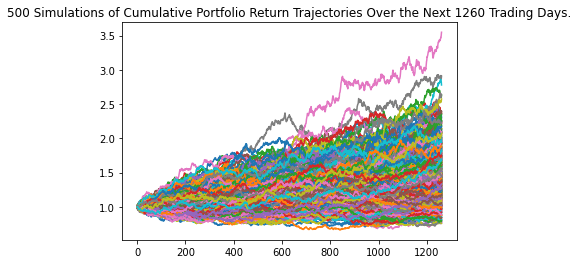

In [27]:
# Plot simulation outcomes
line_plot = MC_5_years.plot_simulation()

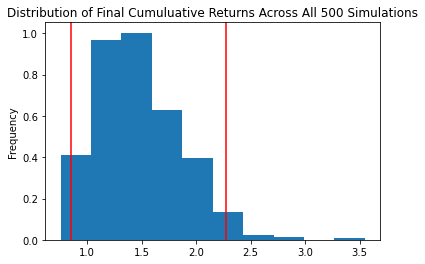

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5_years.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
five_yr_summary_stat = MC_5_years.summarize_cumulative_return()

# Print summary statistics
print(five_yr_summary_stat)

count           500.000000
mean              1.476043
std               0.387861
min               0.757190
25%               1.198492
50%               1.423499
75%               1.717500
max               3.548364
95% CI Lower      0.850663
95% CI Upper      2.277628
Name: 1260, dtype: float64


In [30]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_yr_summary_stat[8]*initial_investment,2)
ci_upper_five = round(five_yr_summary_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $51039.77 and $136657.68


## Ten Years Retirement Option ##

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_years = MCSimulation(
    portfolio_data = stock_data_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\USER\bootcamp\unit-5-homework-api\Unit-5---Financial-Planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.002036  1.003961  0.984804  0.986658  1.011325  0.993557  0.995686   
2     1.007544  1.012437  0.979453  0.968048  1.020751  0.993142  0.995397   
3     1.013560  1.004443  0.987604  0.970069  1.031589  0.987175  1.000379   
4     1.011772  1.014271  0.984998  0.968030  1.032716  0.984214  1.002702   
...        ...       ...       ...       ...       ...       ...       ...   
2516  2.801519  2.435103  2.766616  2.554825  1.427774  3.231155  1.819365   
2517  2.816437  2.431686  2.758415  2.564491  1.430009  3.222915  1.854001   
2518  2.777617  2.414431  2.758269  2.611286  1.428528  3.223297  1.821098   
2519  2.822168  2.413921  2.756955  2.641848  1.417071  3.220308  1.824555   
2520  2.809592  2.412121  2.751731  2.625044  1.412343  3.218891  1.813456   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.007151  1.006081  0.995717  ...  1.001980  1.000496  1.007943   
2     0.999633  1.012012  1.009562  ...  1.008173  1.001613  1.000598   
3     0.988803  1.013925  1.007994  ...  1.022906  0.996678  0.980712   
4     0.994247  1.006624  1.004077  ...  1.030260  0.988711  0.961262   
...        ...       ...       ...  ...       ...       ...       ...   
2516  2.225612  1.372546  1.755880  ...  2.143409  1.987372  2.314120   
2517  2.249266  1.364471  1.772320  ...  2.148771  1.999717  2.281824   
2518  2.255705  1.362201  1.805425  ...  2.145511  2.004037  2.266251   
2519  2.230585  1.358268  1.795701  ...  2.149670  2.002094  2.257004   
2520  2.220412  1.354715  1.800482  ...  2.142826  1.992096  2.272193   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.997675  1.003018  1.002129  1.005626  1.003722  1.008850  1.004080  
2     1.004664  1.007239  1.010284  1.003597  1.013924  1.003596  1.006373  
3     1.013175  1.006032  1.011899  1.001117  1.004777  0.992846  0.989761  
4     1.020514  1.000196  1.025805  1.006727  1.005767  0.992325  0.987219  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.363455  1.387154  2.605282  4.725830  1.683483  1.426857  1.480714  
2517  1.364743  1.380444  2.601536  4.718854  1.690050  1.427403  1.471380  
2518  1.370129  1.363804  2.609397  4.690713  1.689912  1.413078  1.478444  
2519  1.379338  1.367245  2.601364  4.687343  1.689806  1.422864  1.474741  
2520  1.394563  1.367041  2.604907  4.750353  1.704814  1.420408  1.493352  

[2521 rows x 500 columns]

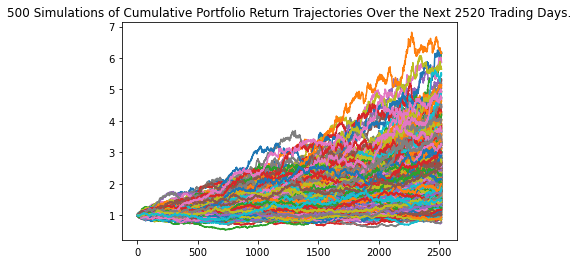

In [38]:
line_plot = MC_10_years.plot_simulation()

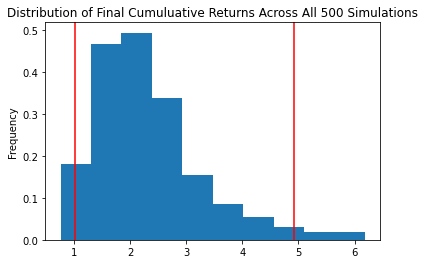

In [39]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10_years.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_yr_summary_stat = MC_10_years.summarize_cumulative_return()

# Print summary statistics
print(ten_yr_summary_stat)

count           500.000000
mean              2.314586
std               0.962840
min               0.757897
25%               1.653086
50%               2.125978
75%               2.701061
max               6.184632
95% CI Lower      1.012681
95% CI Upper      4.922441
Name: 2520, dtype: float64


In [41]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_yr_summary_stat[8]*initial_investment,2)
ci_upper_ten = round(ten_yr_summary_stat[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $60760.85 and $295346.49
